Name : Ashwini Giri USC ID: 5413882039

# 1. Time Series Classification


An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.

(a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/ Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\ %29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities
of the same person. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

The dataset has total of 7 different classes. These are bending1, bending2, cycling, lying, sitting, standing, walking. It has 88 total instances, each of which contains 6 time series and each time series has 480 consecutive values

(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.


Instead of seperating the dataset i have extracted the features and kept all the features in three seperate dataframes.
One dataframe for all features extracted for 88 instances, seconf for test data and third dataframe for train data

Following are the Dataframes used:

1) Complete DataFrame for 88 instances: complete_df

2) Train DataFrame which contains 69 instances: train_df

3) Test DataFrame which contains 19 instances: test_df

(c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

Time-domain features that are usually used in time series classification are:


1) Minimum
2) Maximum
3) Mean
4) Median
5) Standard Deviation
6) Skewness and Kurtosis
7) Cross-Correlation and Auto-Corelations
8) Orders
9) Parameters of the AR and MA part
10) K- peaks
11) K- quantiles

ii. Extract the time-domain features for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly. 1

Extracted 18 features for all 6 time series in each instance. The features used are mean, median and standard deviation for each of 6 times series, hence there are 6*3 = 18 features extracted.

All packages imported

In [66]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm
import statsmodels.api as smp
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn import feature_selection
import itertools

Here I have created empty dataframes for train data and test data. The columns of the dataframes are the features that will be extracted from the AReM dataset.

In [2]:
col = ['avg_rss12_mean','var_rss12_mean','avg_rss13_mean','var_rss13_mean','avg_rss23_mean','var_rss23_mean','avg_rss12_median','var_rss12_median','avg_rss13_median','var_rss13_median','avg_rss23_median','var_rss23_median','avg_rss12_std','var_rss12_std','avg_rss13_std','var_rss13_std','avg_rss23_std','var_rss23_std','target']
test_df = pd.DataFrame(columns=col)
train_df = pd.DataFrame(columns=col)
train_df_split = pd.DataFrame(columns=col)
folders = ['bending1','bending2','cycling','lying','sitting','standing','walking']
datasets = ['dataset1','dataset2','dataset3','dataset4','dataset5','dataset6','dataset7','dataset8','dataset9','dataset10','dataset11','dataset12','dataset13','dataset14','dataset15']


I am creating the test dataframe in the below code. Here first i am reading the files from folders bending1 and bending2, as the datasets 1 and 2 from bending class needs to be added as test data.
In the next loop i am adding datasets 1, 2 and 3 from all other activities to the test dataframe.

In [3]:
row_index = 0
for i in range(2):
    for j in range(2):
        path = folders[i]+'/'+datasets[j]+'.csv'
        data = pd.read_csv(path,skiprows=4)
        data_mean=data.mean()
        data_median=data.median()
        data_std=data.std()
        row = []
        for a in range(6):
            v = data_mean[a+1]
            row.append(v)
        for b in range(6):
            v = data_median[b+1]
            row.append(v)
        for c in range(6):
            v=data_std[c+1]
            row.append(v)
        row.append(folders[i])
        test_df.loc[row_index] = row
        row_index+=1

for i in [2,3,4,5,6]:
    for j in range(3):
        path = folders[i]+'/'+datasets[j]+'.csv'
        data = pd.read_csv(path,skiprows=4)
        data_mean=data.mean()
        data_median=data.median()
        data_std=data.std()
        row = []
        for a in range(6):
            v = data_mean[a+1]
            row.append(v)
        for b in range(6):
            v = data_median[b+1]
            row.append(v)
        for c in range(6):
            v=data_std[c+1]
            row.append(v)
        row.append(folders[i])
        test_df.loc[row_index] = row
        row_index+=1

I am creating the train dataframe in the below code. Here in the first and second loop am reading the files from folders bending1 and bending2, as the datasets except 1 and 2 from bending class needs to be added as train data.
In the next loop i am adding datasets 3 onwards from all other activities to the train dataframe.

In [4]:
row_index = 0
for i in range(1):
    for j in [2,3,4,5,6]:
        path = folders[i]+'/'+datasets[j]+'.csv'
        data = pd.read_csv(path,skiprows=4)
        data_mean=data.mean()
        data_median=data.median()
        data_std=data.std()
        row = []
        for a in range(6):
            v = data_mean[a+1]
            row.append(v)
        for b in range(6):
            v = data_median[b+1]
            row.append(v)
        for c in range(6):
            v=data_std[c+1]
            row.append(v)
        row.append(folders[i])
        train_df.loc[row_index] = row
        row_index+=1

for i in [1]:
    for j in [2,3,4,5]:
        path = folders[i]+'/'+datasets[j]+'.csv'
        data = pd.read_csv(path,skiprows=4)
        data_mean=data.mean()
        data_median=data.median()
        data_std=data.std()
        row = []
        for a in range(6):
            v = data_mean[a+1]
            row.append(v)
        for b in range(6):
            v = data_median[b+1]
            row.append(v)
        for c in range(6):
            v=data_std[c+1]
            row.append(v)
        row.append(folders[i])
        train_df.loc[row_index] = row
        row_index+=1
        
for i in [2,3,4,5,6]:
    for j in [2,4,5,6,7,8,9,10,11,12,13,14]:
        path = folders[i]+'/'+datasets[j]+'.csv'
        data = pd.read_csv(path,skiprows=4,error_bad_lines=False)
        data_mean=data.mean()
        data_median=data.median()
        data_std=data.std()
        row = []
        for a in range(6):
            v = data_mean[a+1]
            row.append(v)
        for b in range(6):
            v = data_median[b+1]
            row.append(v)
        for c in range(6):
            v=data_std[c+1]
            row.append(v)
        row.append(folders[i])
        train_df.loc[row_index] = row
        row_index+=1

In [1483]:
print('\n\t\t\t\t***********Test Set************')
test_df


				***********Test Set************


,avg_rss12_mean,var_rss12_mean,avg_rss13_mean,var_rss13_mean,avg_rss23_mean,var_rss23_mean,avg_rss12_median,var_rss12_median,avg_rss13_median,var_rss13_median,avg_rss23_median,var_rss23_median,avg_rss12_std,var_rss12_std,avg_rss13_std,var_rss13_std,avg_rss23_std,var_rss23_std,target
0,40.624792,0.358604,19.040937,0.832542,34.311292,0.570583,40.500,0.430,19.250,0.500,35.000,0.430,1.476967,0.322605,4.462952,0.965659,2.188449,0.582915,bending1
1,42.812812,0.372438,20.096979,0.876438,33.024583,0.571083,42.500,0.470,21.000,0.500,33.000,0.430,1.435550,0.289158,3.893737,1.047259,1.995255,0.601010,bending1
2,24.562958,0.590833,19.121333,0.736771,23.493042,0.700188,24.250,0.430,20.250,0.470,23.750,0.500,3.737514,0.837408,4.299612,0.927048,3.693786,0.693720,bending2
3,27.464604,0.449708,20.842542,0.779917,17.617937,1.122125,28.000,0.430,20.750,0.500,18.000,0.830,3.583582,0.767197,3.826268,0.904436,5.053642,1.012342,bending2
4,37.177042,2.374208,16.531083,2.910604,19.607250,2.921729,36.250,1.920,16.670,2.620,20.000,2.500,3.581301,1.601799,3.430906,1.600137,2.890347,1.852600,cycling
5,37.561188,2.080688,16.567042,3.033875,19.518896,2.765896,36.875,1.700,17.000,2.950,20.000,2.450,3.226507,1.639258,3.691401,1.625415,2.727377,1.769203,cycling
6,37.058708,2.438146,16.388312,2.980688,18.125958,2.983750,36.000,1.920,16.500,2.860,18.875,2.570,3.710180,1.996887,3.537950,1.612059,3.537144,1.815730,cycling
7,27.716375,0.363688,6.078563,0.871021,8.337438,0.734271,27.500,0.430,6.250,0.820,8.750,0.710,1.442253,0.394817,3.468994,0.777400,4.074511,0.613688,lying
8,44.182937,0.101875,6.679958,0.584104,4.376292,0.692771,48.000,0.000,6.250,0.430,3.330,0.500,7.495615,0.346756,1.936492,0.749945,3.274539,0.675781,lying
9,48.004167,0.007167,4.900563,0.397313,7.624896,0.641229,48.000,0.000,5.500,0.430,9.000,0.500,0.032038,0.055106,2.566429,0.447127,3.268502,0.388372,lying


In [1484]:
print("\n\t\t\t\t*************Training Set************")
train_df


				*************Training Set************


,avg_rss12_mean,var_rss12_mean,avg_rss13_mean,var_rss13_mean,avg_rss23_mean,var_rss23_mean,avg_rss12_median,var_rss12_median,avg_rss13_median,var_rss13_median,avg_rss23_median,var_rss23_median,avg_rss12_std,var_rss12_std,avg_rss13_std,var_rss13_std,avg_rss23_std,var_rss23_std,target
0,43.954500,0.426250,22.122354,0.497313,35.588458,0.493292,44.330,0.470,23.000,0.430,36.000,0.430,1.558835,0.338690,3.030943,0.550657,1.999604,0.513506,bending1
1,42.179813,0.696042,22.183625,0.989917,33.493917,0.613521,43.500,0.500,23.000,0.830,35.000,0.500,3.670666,0.630860,3.810469,0.953730,3.849448,0.524317,bending1
2,41.678063,0.535979,19.006562,0.841875,29.857083,0.383292,41.750,0.500,19.125,0.500,30.000,0.430,2.243490,0.405469,4.087107,0.928801,2.411026,0.389164,bending1
3,43.454958,0.378083,15.793333,0.849354,23.034792,0.679646,43.250,0.470,15.000,0.500,23.500,0.500,1.386098,0.315566,3.847638,0.995761,2.488862,0.622534,bending1
4,43.969125,0.413125,15.868021,0.666354,22.103750,0.555313,44.500,0.470,16.250,0.470,21.670,0.490,1.618364,0.263111,3.742420,0.788985,3.318301,0.487826,bending1
5,32.586208,0.516125,13.941625,0.868896,20.345708,1.162042,33.000,0.430,14.250,0.500,19.585,0.830,6.238143,0.789957,5.883266,1.027013,5.032424,1.332980,bending2
6,29.881938,0.256438,8.166250,0.544646,18.117896,0.701625,30.000,0.000,8.750,0.470,18.000,0.710,1.153837,0.275833,3.403613,0.644369,1.745970,0.481103,bending2
7,30.938104,0.467167,14.589833,0.777542,18.389083,1.107354,29.000,0.430,15.750,0.470,17.500,0.830,7.684146,0.734444,7.638935,1.014102,5.845911,1.080842,bending2
8,31.058250,0.405458,15.296667,0.823542,14.407187,1.098104,29.710,0.430,15.000,0.500,13.000,0.940,4.829794,0.566668,4.841975,0.902248,7.853427,0.831480,bending2
9,37.058708,2.438146,16.388312,2.980688,18.125958,2.983750,36.000,1.920,16.500,2.860,18.875,2.570,3.710180,1.996887,3.537950,1.612059,3.537144,1.815730,cycling


The below piece of code concatinates the test and train dataframe to make a complete dataframe of all the datasets.

In [1485]:
complete_df = pd.concat([train_df,test_df],axis=0)

In [1486]:
print("\t\t\t\t***********All Features for 88 instances***********")
complete_df

				***********All Features for 88 instances***********


,avg_rss12_mean,var_rss12_mean,avg_rss13_mean,var_rss13_mean,avg_rss23_mean,var_rss23_mean,avg_rss12_median,var_rss12_median,avg_rss13_median,var_rss13_median,avg_rss23_median,var_rss23_median,avg_rss12_std,var_rss12_std,avg_rss13_std,var_rss13_std,avg_rss23_std,var_rss23_std,target
0,43.954500,0.426250,22.122354,0.497313,35.588458,0.493292,44.330,0.470,23.000,0.430,36.000,0.430,1.558835,0.338690,3.030943,0.550657,1.999604,0.513506,bending1
1,42.179813,0.696042,22.183625,0.989917,33.493917,0.613521,43.500,0.500,23.000,0.830,35.000,0.500,3.670666,0.630860,3.810469,0.953730,3.849448,0.524317,bending1
2,41.678063,0.535979,19.006562,0.841875,29.857083,0.383292,41.750,0.500,19.125,0.500,30.000,0.430,2.243490,0.405469,4.087107,0.928801,2.411026,0.389164,bending1
3,43.454958,0.378083,15.793333,0.849354,23.034792,0.679646,43.250,0.470,15.000,0.500,23.500,0.500,1.386098,0.315566,3.847638,0.995761,2.488862,0.622534,bending1
4,43.969125,0.413125,15.868021,0.666354,22.103750,0.555313,44.500,0.470,16.250,0.470,21.670,0.490,1.618364,0.263111,3.742420,0.788985,3.318301,0.487826,bending1
5,32.586208,0.516125,13.941625,0.868896,20.345708,1.162042,33.000,0.430,14.250,0.500,19.585,0.830,6.238143,0.789957,5.883266,1.027013,5.032424,1.332980,bending2
6,29.881938,0.256438,8.166250,0.544646,18.117896,0.701625,30.000,0.000,8.750,0.470,18.000,0.710,1.153837,0.275833,3.403613,0.644369,1.745970,0.481103,bending2
7,30.938104,0.467167,14.589833,0.777542,18.389083,1.107354,29.000,0.430,15.750,0.470,17.500,0.830,7.684146,0.734444,7.638935,1.014102,5.845911,1.080842,bending2
8,31.058250,0.405458,15.296667,0.823542,14.407187,1.098104,29.710,0.430,15.000,0.500,13.000,0.940,4.829794,0.566668,4.841975,0.902248,7.853427,0.831480,bending2
9,37.058708,2.438146,16.388312,2.980688,18.125958,2.983750,36.000,1.920,16.500,2.860,18.875,2.570,3.710180,1.996887,3.537950,1.612059,3.537144,1.815730,cycling


iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a bootsrap confidence interval for the standard deviation of each feature.

The estimated standard deviation is maintained in esti_std dataframe

In [1487]:
com_std_columns = ['Feature','Estimated Standard Deviation']
com_std = complete_df.std()
com_std_lst = com_std.values.T.tolist()
esti_std = pd.DataFrame(columns=com_std_columns)
for i in range(0,18):
    row = []
    row.append(col[i])
    row.append(com_std_lst[i])
    esti_std.loc[i] = row

Now using bootstrap to calculate the standard deviationa and the confidence interval

In [1488]:
std_columns = ['Feature','Standard Deviation','Confidence Interval']
std_dataframe = pd.DataFrame(columns=std_columns)
boostrap_std = {}
loc_index =0
for i in range(0,18):
    row = []
    col1 = complete_df[[col[i]]]
    col1 = col1.values.T.tolist()
    col1=col1[0]
    samples = np.array(col1[:200])
    bt = bs.bootstrap(samples, stat_func=bs_stats.std)
    row.append(col[i])
    row.append(bt.value)
    con_int = '('+str(bt.lower_bound)+', '+str(bt.upper_bound)+')'
    row.append(con_int)
    std_dataframe.loc[loc_index] =  row                  
    loc_index+=1

In [1489]:
print("**********Estimated Standard Deviations of all Features***********\n")
print(esti_std)
print('\n\n')
print("********Standard Deviation using Bootstrapped and Confidence Interval for all features*********\n")                       
print(std_dataframe)

**********Estimated Standard Deviations of all Features***********

             Feature  Estimated Standard Deviation
0     avg_rss12_mean                      5.415909
1     var_rss12_mean                      1.571969
2     avg_rss13_mean                      4.074281
3     var_rss13_mean                      1.159650
4     avg_rss23_mean                      5.595420
5     var_rss23_mean                      1.145855
6   avg_rss12_median                      5.548348
7   var_rss12_median                      1.414169
8   avg_rss13_median                      4.096399
9   var_rss13_median                      1.137273
10  avg_rss23_median                      5.665694
11  var_rss23_median                      1.074291
12     avg_rss12_std                      1.808129
13     var_rss12_std                      0.886337
14     avg_rss13_std                      0.950019
15     var_rss13_std                      0.459649
16     avg_rss23_std                      1.024200
17     var_rss

iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

According to my judgement the three most important time-domain features are mean, median and standard deviation

(d) Binary Classification Using Logistic Regression


i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 120 of the textbook).2

Plotting 3D graph  of each of the time series from 1,2 and 3. This was done just for practice, please do not consider it in the evaluation.

In [1490]:
#Done for fun and practice, please do not consider this in evaluation
def plot3d(train_df,x):
    timeseries_1_2_6 = train_df[['avg_rss12_mean','var_rss12_mean','var_rss23_mean','avg_rss12_median','var_rss12_median','var_rss23_median','avg_rss12_std','var_rss12_std','var_rss23_std','target']]
    bending_df = pd.DataFrame(columns=['avg_rss12_mean','var_rss12_mean','var_rss23_mean','avg_rss12_median','var_rss12_median','var_rss23_median','avg_rss12_std','var_rss12_std','var_rss23_std','target'])
    non_bending_df = pd.DataFrame(columns=['avg_rss12_mean','var_rss12_mean','var_rss23_mean','avg_rss12_median','var_rss12_median','var_rss23_median','avg_rss12_std','var_rss12_std','var_rss23_std','target'])

    for i in range(0,x):
        bending_df.loc[i] = timeseries_1_2_6.loc[i]

    for i in range(x,len(timeseries_1_2_6)):
        non_bending_df.loc[i] = timeseries_1_2_6.loc[i]
        
    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot(131,projection = '3d')
    ax.scatter(bending_df[['avg_rss12_mean']],bending_df[['var_rss12_mean']],bending_df[['var_rss23_mean']],c = 'red',marker='o',s=50, label = 'bending')
    ax.scatter(non_bending_df[['avg_rss12_mean']],non_bending_df[['var_rss12_mean']],non_bending_df[['var_rss23_mean']],c = 'blue',marker='o',s=50, label = 'others')
    ax.set_xlabel('avg_rss12_mean')
    ax.set_ylabel('var_rss12_mean')
    ax.set_zlabel('var_rss23_mean')
    ax.legend()
    ax.set_title('Scatter of feature mean')
#     plt.show()

#     fig = plt.figure(figsize=(7,7))
    ax1 = fig.add_subplot(132,projection = '3d')
    ax1.scatter(bending_df[['avg_rss12_median']],bending_df[['var_rss12_median']],bending_df[['var_rss23_median']],c = 'orange',marker='o',s=50, label = 'bending')
    ax1.scatter(non_bending_df[['avg_rss12_median']],non_bending_df[['var_rss12_median']],non_bending_df[['var_rss23_median']],c = 'green',marker='o',s=50,label = 'others')
    ax1.set_xlabel('avg_rss12_median')
    ax1.set_ylabel('var_rss12_median')
    ax1.set_zlabel('var_rss23_median')
    ax1.legend()
    ax1.set_title('Scatter of feature median')
#     plt.show()

#     fig = plt.figure(figsize=(7,7))
    ax2 = fig.add_subplot(133,projection = '3d')
    ax2.scatter(bending_df[['avg_rss12_std']],bending_df[['var_rss12_std']],bending_df[['var_rss23_std']],c = 'yellow',marker='o',s=50,label = 'bending')
    ax2.scatter(non_bending_df[['avg_rss12_std']],non_bending_df[['var_rss12_std']],non_bending_df[['var_rss23_std']],c = 'black',marker='o',s=50, label = 'others')
    ax2.set_xlabel('avg_rss12_std')
    ax2.set_ylabel('var_rss12_std')
    ax2.set_zlabel('var_rss23_std')
    ax2.legend()
    ax2.set_title('Scatter of feature standard deviation')
    plt.show()

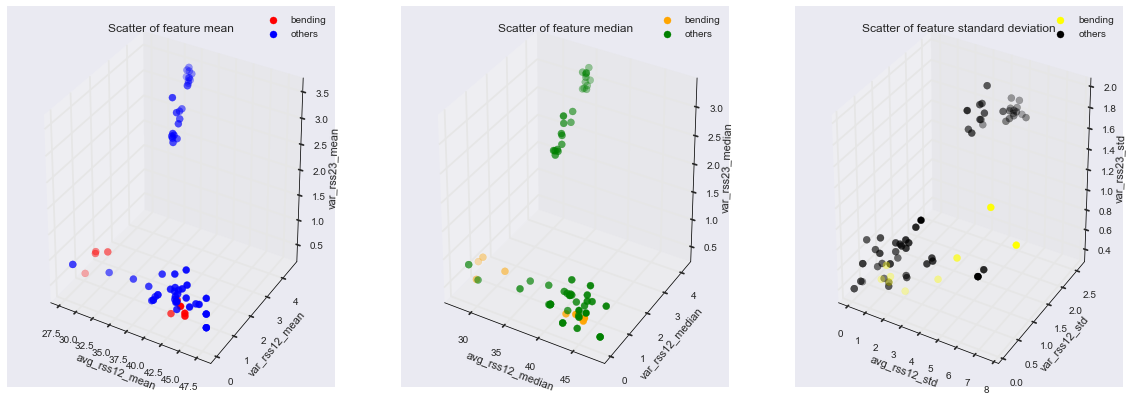

In [1491]:
plot3d(train_df,9)

Plotting the classification between the bending and the non bending class. The bending class is plotted using the blue colored scatter and other classes are plotted using the red color.

In [24]:
def plotgraph(train_df):
    col_scatter = ['avg_rss12_mean','var_rss12_mean','var_rss23_mean','avg_rss12_median','var_rss12_median','var_rss23_median','avg_rss12_std','var_rss12_std','var_rss23_std']
    plt.figure(figsize=(18,7))
    lst = [1,2,3,4,5,6,7,8,9]
    for lst in lst:
        for i in range(0,len(train_df)):
            if (train_df.loc[i]['target']== 1):
                bending = plt.scatter(lst,train_df.loc[i][col_scatter[lst-1]],color = 'blue', label='bending')
            else:
                others = plt.scatter(lst,train_df.loc[i][col_scatter[lst-1]],color = 'red',label='others',alpha='0.1')
    # plt.legends()
    plt.legend((bending,others),
               ('bending','others'),
               scatterpoints=1,
               loc='top right',
               ncol=3,
               fontsize=8)
    plt.title('Scatter plot of bending Vs non bending classes for features 1,2 and 6',color='green')
    plt.xticks(range(1,10),col_scatter)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

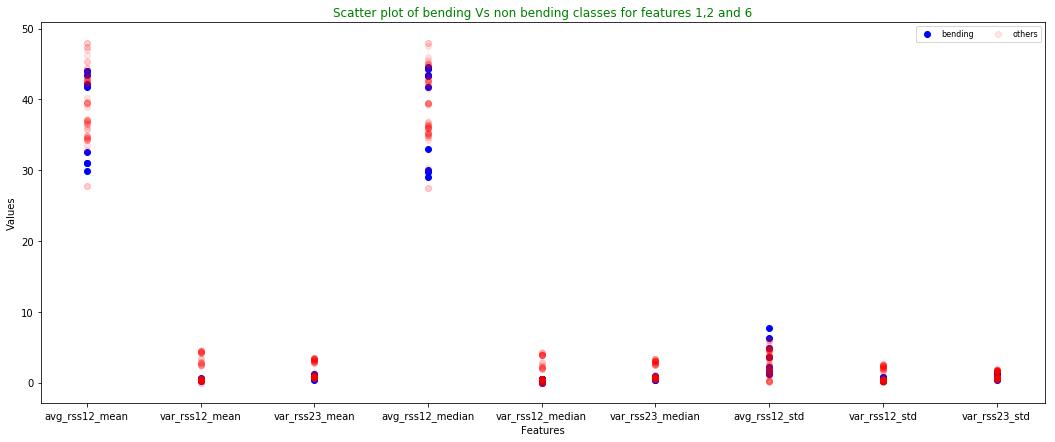

In [25]:
plotgraph(train_df)

In [ ]:
Interrelation between the 

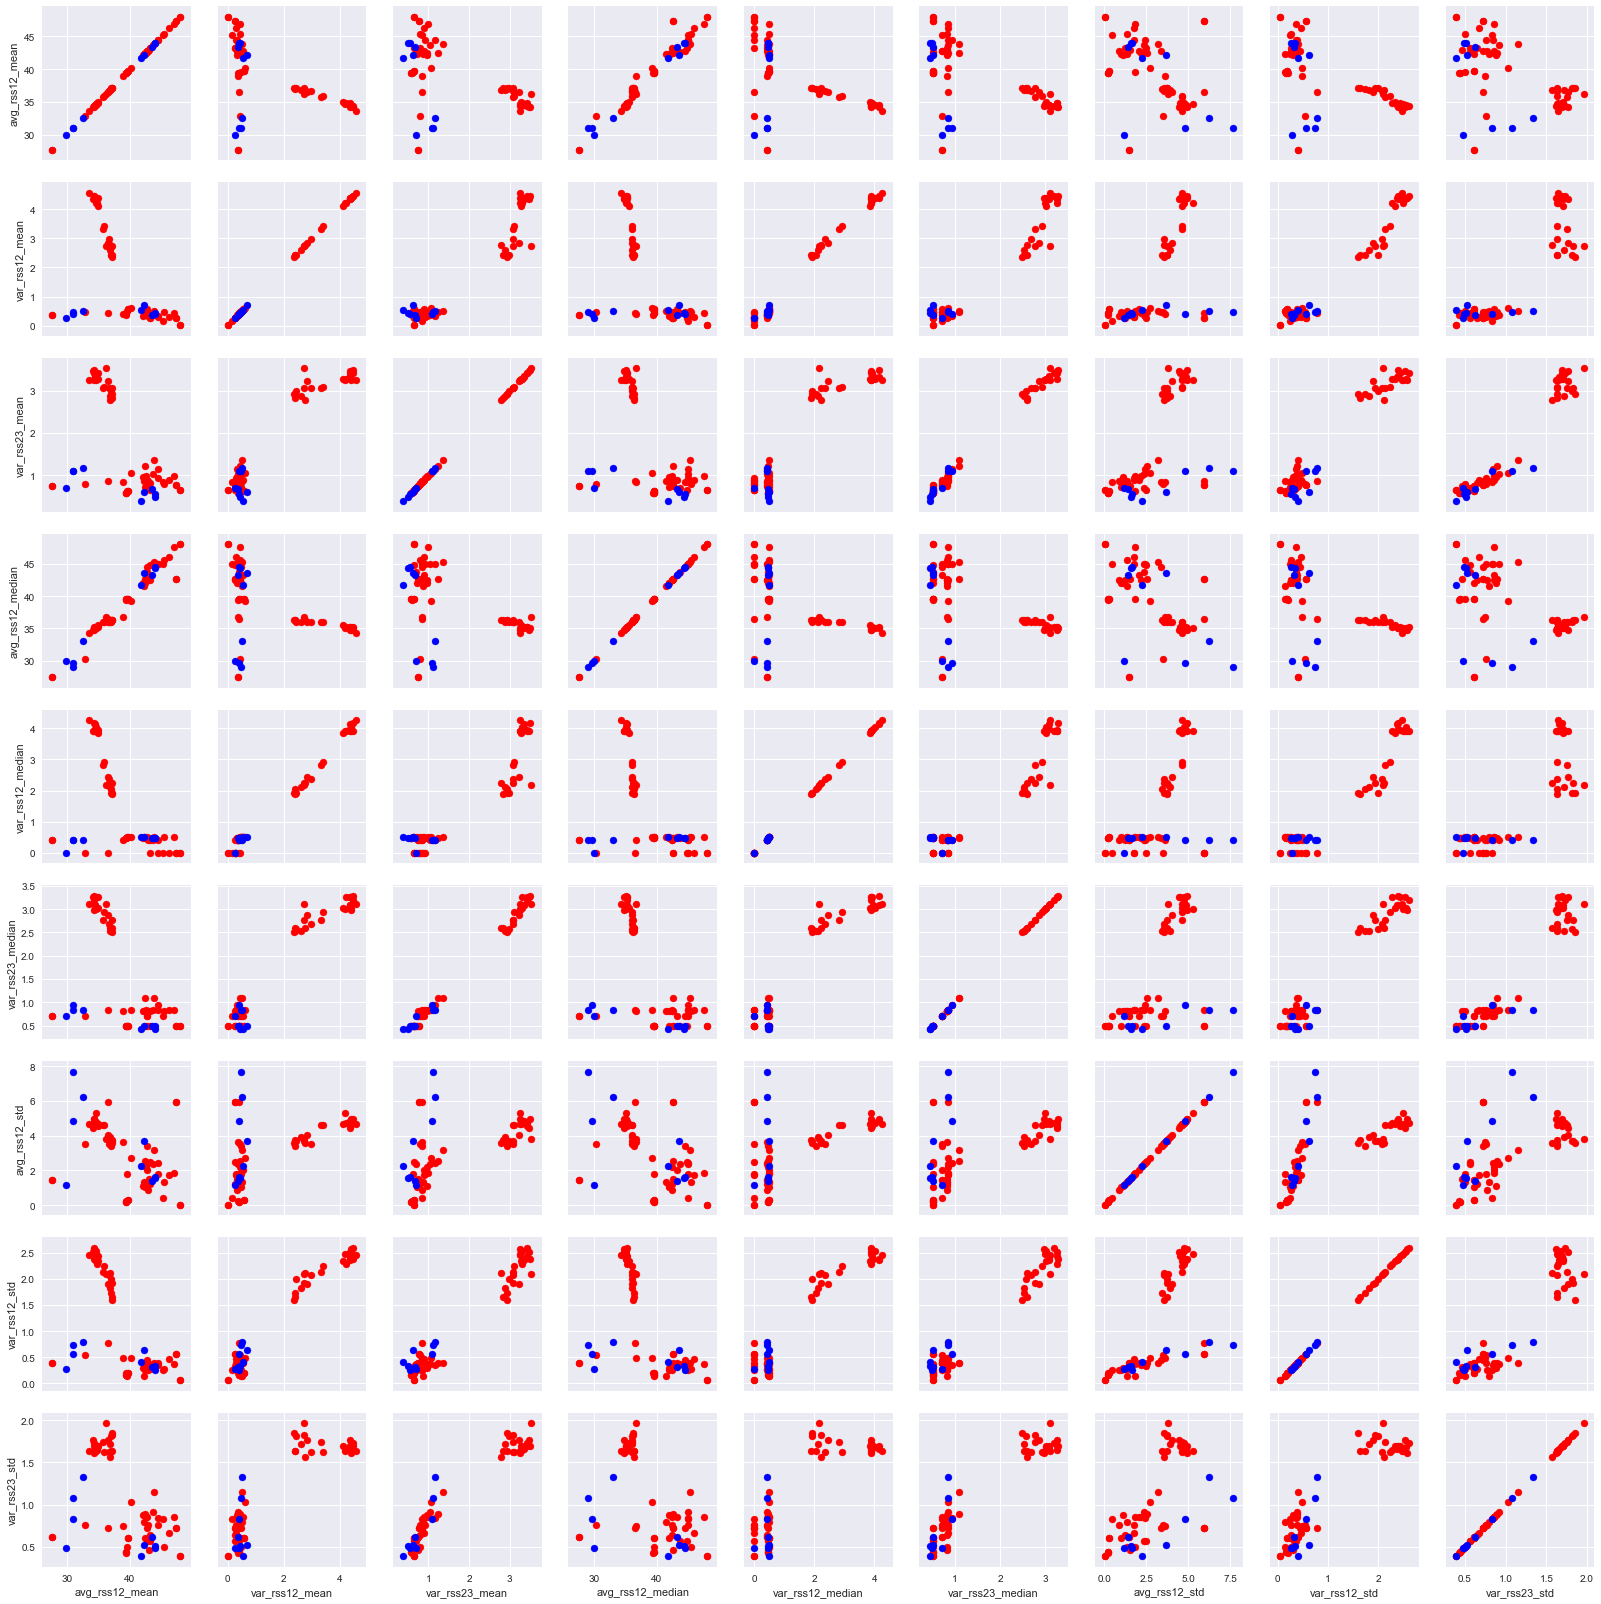

In [1295]:
import seaborn as sns; sns.set()
g = sns.PairGrid(train_df,vars=col_scatter,hue = 'target',palette={0:'red',1:'blue'})
g=g.map(plt.scatter)

plt.show()

ii. Break each time series in your training set into two (approximately) equal length time series and repeat the experiment in 1(d)i. Do you see any con- siderable difference in the results with those of 1(d)i?

Breaking each time series into two of equal lenght and storing it in dataframe train_df_split. splitting the data into half and then extracting features

In [26]:
row_index = 0
for i in range(1):
    for j in [2,3,4,5,6]:
        path = folders[i]+'/'+datasets[j]+'.csv'
        data = pd.read_csv(path,skiprows=4)
        data_split = np.split(data,[240],axis=0)
        for z in range(2):
            data_mean=data_split[z].mean()
            data_median=data_split[z].median()
            data_std=data_split[z].std()
            row = []
            for a in range(6):
                v = data_mean[a+1]
                row.append(v)
            for b in range(6):
                v = data_median[b+1]
                row.append(v)
            for c in range(6):
                v=data_std[c+1]
                row.append(v)
            row.append(folders[i])
            train_df_split.loc[row_index] = row
            row_index+=1

for i in [1]:
    for j in [2,3,4,5]:
        path = folders[i]+'/'+datasets[j]+'.csv'
        data = pd.read_csv(path,skiprows=4)
        data_split = np.split(data,[240],axis=0)
        for z in range(2):
            data_mean=data_split[z].mean()
            data_median=data_split[z].median()
            data_std=data_split[z].std()
            row = []
            for a in range(6):
                v = data_mean[a+1]
                row.append(v)
            for b in range(6):
                v = data_median[b+1]
                row.append(v)
            for c in range(6):
                v=data_std[c+1]
                row.append(v)
            row.append(folders[i])
            train_df_split.loc[row_index] = row
            row_index+=1
        
for i in [2,3,4,5,6]:
    for j in [2,4,5,6,7,8,9,10,11,12,13,14]:
        path = folders[i]+'/'+datasets[j]+'.csv'
        
        data = pd.read_csv(path,skiprows=4)
        data_split = np.split(data,[240],axis=0)
        for z in range(2):
            data_mean=data_split[z].mean()
            data_median=data_split[z].median()
            data_std=data_split[z].std()
            row = []
            for a in range(6):
                v = data_mean[a+1]
                row.append(v)
            for b in range(6):
                v = data_median[b+1]
                row.append(v)
            for c in range(6):
                v=data_std[c+1]
                row.append(v)
            row.append(folders[i])
            train_df_split.loc[row_index] = row
            row_index+=1


In [7]:
train_df.replace({'bending1':1,'bending2':1,'cycling':0,'lying':0,'sitting':0,'standing':0,'walking':0},inplace=True)
train_df

,avg_rss12_mean,var_rss12_mean,avg_rss13_mean,var_rss13_mean,avg_rss23_mean,var_rss23_mean,avg_rss12_median,var_rss12_median,avg_rss13_median,var_rss13_median,avg_rss23_median,var_rss23_median,avg_rss12_std,var_rss12_std,avg_rss13_std,var_rss13_std,avg_rss23_std,var_rss23_std,target
0,43.954500,0.426250,22.122354,0.497313,35.588458,0.493292,44.330,0.470,23.000,0.430,36.000,0.430,1.558835,0.338690,3.030943,0.550657,1.999604,0.513506,1
1,42.179813,0.696042,22.183625,0.989917,33.493917,0.613521,43.500,0.500,23.000,0.830,35.000,0.500,3.670666,0.630860,3.810469,0.953730,3.849448,0.524317,1
2,41.678063,0.535979,19.006562,0.841875,29.857083,0.383292,41.750,0.500,19.125,0.500,30.000,0.430,2.243490,0.405469,4.087107,0.928801,2.411026,0.389164,1
3,43.454958,0.378083,15.793333,0.849354,23.034792,0.679646,43.250,0.470,15.000,0.500,23.500,0.500,1.386098,0.315566,3.847638,0.995761,2.488862,0.622534,1
4,43.969125,0.413125,15.868021,0.666354,22.103750,0.555313,44.500,0.470,16.250,0.470,21.670,0.490,1.618364,0.263111,3.742420,0.788985,3.318301,0.487826,1
5,32.586208,0.516125,13.941625,0.868896,20.345708,1.162042,33.000,0.430,14.250,0.500,19.585,0.830,6.238143,0.789957,5.883266,1.027013,5.032424,1.332980,1
6,29.881938,0.256438,8.166250,0.544646,18.117896,0.701625,30.000,0.000,8.750,0.470,18.000,0.710,1.153837,0.275833,3.403613,0.644369,1.745970,0.481103,1
7,30.938104,0.467167,14.589833,0.777542,18.389083,1.107354,29.000,0.430,15.750,0.470,17.500,0.830,7.684146,0.734444,7.638935,1.014102,5.845911,1.080842,1
8,31.058250,0.405458,15.296667,0.823542,14.407187,1.098104,29.710,0.430,15.000,0.500,13.000,0.940,4.829794,0.566668,4.841975,0.902248,7.853427,0.831480,1
9,37.058708,2.438146,16.388312,2.980688,18.125958,2.983750,36.000,1.920,16.500,2.860,18.875,2.570,3.710180,1.996887,3.537950,1.612059,3.537144,1.815730,0


Plotted 3D graph just for fun please do not consider it in the evaluation

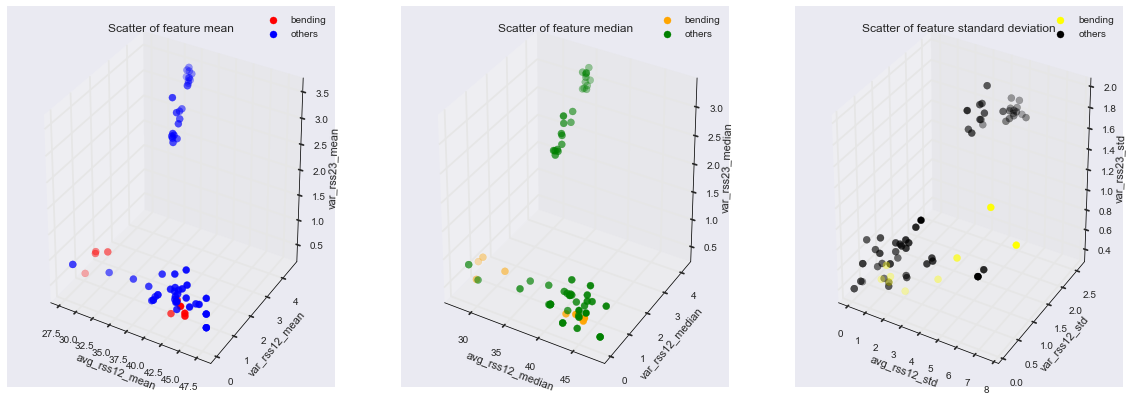

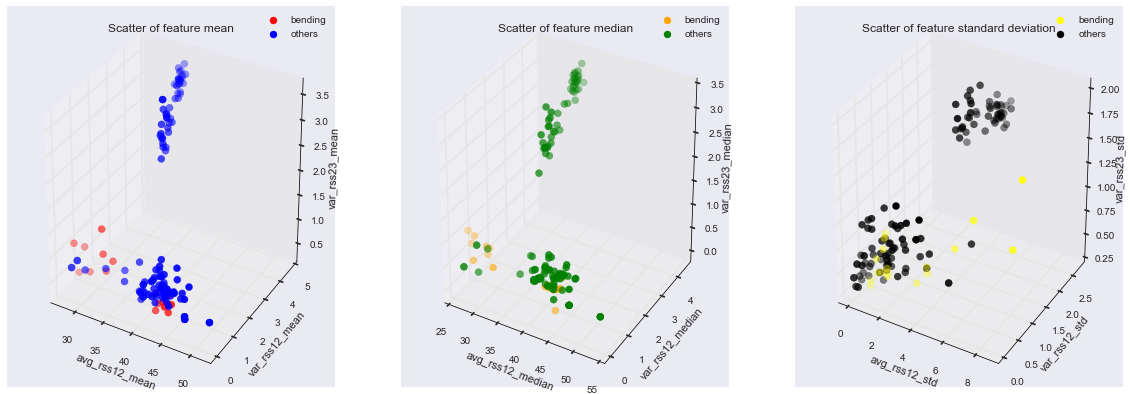

In [1496]:
plot3d(train_df,9)
plot3d(train_df_split,18)

Below is the graph for the time series 1,2 and 6 using the doubled dataset

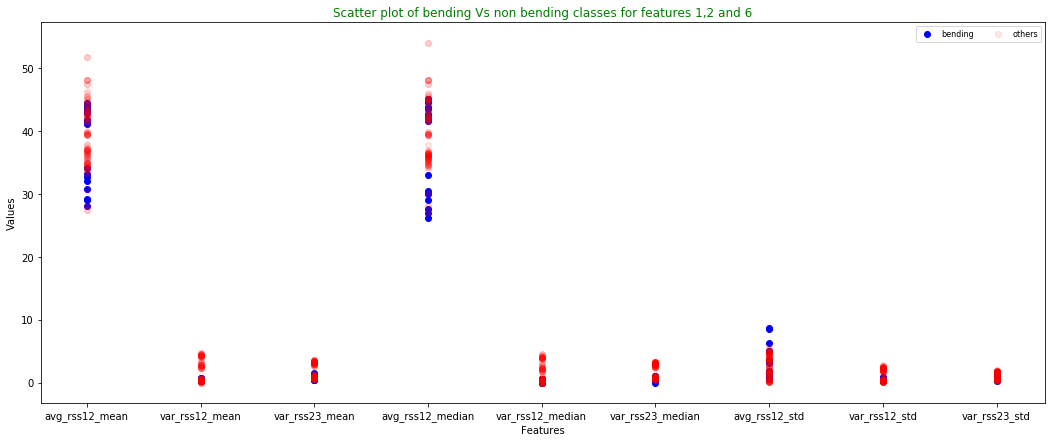

In [29]:
plotgraph(train_df_split)

Yes there is a difference when we increase the size of the dataset. After splitting the dataset into two the size of bending class is increased and it has become easier to differenciate between the classes.

iii. Break each time series in your training set into l ∈ {1, 2, . . . , 10}3 time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Calculate the p-values for your logistic regression parameters and refit a logistic regression model using your pruned set of features.4 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to de- termine the best value of l. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way!

Here i am creating a dictionary to store the dataframe after splitting it into l ∈ {1, 2, . . . , 10}. The names of the dataframes stored based on the splits are: L=1, train_df_split1. L=2, train_df_split2 and so on.

In [30]:
split_name_dict = {}
split_name_lst =[]
for u in range(2,11):
    split_name_dict["train_df_split{0}".format(u)] = pd.DataFrame(columns=col)

In [32]:
for key in split_name_dict.keys():
    split_name_lst.append(key)
split_name_dict['train_df_split1'] = train_df
split_name_dict['train_df_split1'].replace({'bending1':1,'bending2':1,'cycling':0,'lying':0,'sitting':0,'standing':0,'walking':0},inplace=True)

Splitting the data into L = {1,2,3,4,5,6,7,8,9,10} dataframes.

In [33]:
divider_dict = {2:[240],3:[160,320],4:[120,240,360],5:[96,192,288,384],6:[80,160,240,320,400],7:[69,137,206,274,343,412],8:[60,120,180,240,300,360,420],9:[53,107,160,214,267,320,374,427],10:[48,96,144,192,240,288,336,384,432]}
for s in range(2,11):
    row_index = 0
    name_index = s-2
    for i in range(1):
        for j in [2,3,4,5,6]:
            path = folders[i]+'/'+datasets[j]+'.csv'
            data = pd.read_csv(path,skiprows=4)
            data_split = np.split(data,divider_dict[s],axis=0)
            for z in range(len(data_split)):
                data_mean=data_split[z].mean()
                data_median=data_split[z].median()
                data_std=data_split[z].std()
                row = []
                for a in range(6):
                    v = data_mean[a+1]
                    row.append(v)
                for b in range(6):
                    v = data_median[b+1]
                    row.append(v)
                for c in range(6):
                    v=data_std[c+1]
                    row.append(v)
                row.append(1)
                split_name_dict[split_name_lst[name_index]].loc[row_index] = row
                row_index+=1

    for i in [1]:
        for j in [2,3,4,5]:
            path = folders[i]+'/'+datasets[j]+'.csv'
            data = pd.read_csv(path,skiprows=4)
            data_split = np.split(data,divider_dict[s],axis=0)
            for z in range(len(data_split)):
                data_mean=data_split[z].mean()
                data_median=data_split[z].median()
                data_std=data_split[z].std()
                row = []
                for a in range(6):
                    v = data_mean[a+1]
                    row.append(v)
                for b in range(6):
                    v = data_median[b+1]
                    row.append(v)
                for c in range(6):
                    v=data_std[c+1]
                    row.append(v)
                row.append(1)
                split_name_dict[split_name_lst[name_index]].loc[row_index] = row
                row_index+=1

    for i in [2,3,4,5,6]:
        for j in [2,4,5,6,7,8,9,10,11,12,13,14]:
            path = folders[i]+'/'+datasets[j]+'.csv'

            data = pd.read_csv(path,skiprows=4)
            data_split = np.split(data,divider_dict[s],axis=0)
            for z in range(len(data_split)):
                data_mean=data_split[z].mean()
                data_median=data_split[z].median()
                data_std=data_split[z].std()
                row = []
                for a in range(6):
                    v = data_mean[a+1]
                    row.append(v)
                for b in range(6):
                    v = data_median[b+1]
                    row.append(v)
                for c in range(6):
                    v=data_std[c+1]
                    row.append(v)
                row.append(0)
                split_name_dict[split_name_lst[name_index]].loc[row_index] = row
                row_index+=1


Using K-Fold cross validation on L = {1,2,3,4,5,6,7,8,9,10} and logistic regression to find the accuracy. This will help us to select the best value of L. The more the accuracy at a particular value the better is the value of L.

In [34]:
kfold_accuracy_scores = {}
for key,value in split_name_dict.items():
    dfs = np.split(value,[-1],axis=1)
    model = LogisticRegression()
    score = cross_val_score(model,dfs[0],dfs[1],cv=5)
    kfold_accuracy_scores[key] = score.mean()
kfold_accuracy_scores

{'train_df_split1': 0.956043956043956,
 'train_df_split10': 0.9028985507246376,
 'train_df_split2': 0.9063492063492063,
 'train_df_split3': 0.9026713124274099,
 'train_df_split4': 0.8981818181818182,
 'train_df_split5': 0.898550724637681,
 'train_df_split6': 0.925154275639142,
 'train_df_split7': 0.9111254295532646,
 'train_df_split8': 0.9091728091728092,
 'train_df_split9': 0.9193548387096774}

As seen from the output the best L where K fold has the maximum score at L=1. Hence using L=1 as it has a score of 95%

The below code was a trial to check how the stas model works. Please do not consider it in the evaluation.

In [37]:
#Alternative package used to try logistic regression please do not consider this in evaluation
dfs = np.split(split_name_dict['train_df_split1'],[-1],axis=1)
logit = sm.Logit(dfs[1],dfs[0]).fit(method='nm')
pvalues = logit.pvalues
max_p = logit.pvalues.max()
# print(max_p)
index = 0
for i in range(0,len(pvalues)):
    if pvalues[i] == max_p:
        index = i     

Applying logistic regression on the dataframe which had the best value of L. The split was at L=1 and the dataframe used is train_df_split1.

In [40]:
dfs = np.split(split_name_dict['train_df_split1'],[-1],axis=1)
skmodel = LogisticRegression().fit(dfs[0],dfs[1])

In [41]:
#Coefficients of the predictors in the in the logistic regression model
skmodel.coef_

array([[-0.64991424, -0.30762073,  0.37488723, -0.23133632,  1.13726035,
        -0.27921648,  0.16782765, -0.00822811, -0.52844806, -0.29892276,
        -0.06892695, -0.28603365, -0.09555414, -0.2360844 , -0.15385364,
        -0.02139681,  0.70747278, -0.17708181]])

Using feature selection to find the best features to be used and the remaining to be pruned

In [42]:
f,pval = feature_selection.f_classif(dfs[0],dfs[1])

In [43]:
pruned_features = []
for i in range(0,len(pval)):
    if(pval[i]<0.05):
        print(col[i],' -----> ',pval[i])
        pruned_features.append(col[i])

var_rss12_mean  ----->  0.03498147840761755
var_rss13_mean  ----->  0.03813825128265495
avg_rss23_mean  ----->  5.855088990222132e-09
var_rss23_mean  ----->  0.013196934257152392
var_rss12_median  ----->  0.0421802870570279
avg_rss13_median  ----->  0.046768431183124445
var_rss13_median  ----->  0.020565805832970588
avg_rss23_median  ----->  5.8247754618034686e-08
var_rss23_median  ----->  0.01241152254583981
avg_rss13_std  ----->  0.003823676706248659
var_rss23_std  ----->  0.029638992257648083


As seen there are 9 features which can be pruned based on p-values. Hence using the 11 features are refitting the logistic regression model.

Creating a new dataframe after pruning the dataset. The dataframe used to store the pruned dataset is pruned_df_train and pruned_df_test

In [44]:
pruned_features.append('target')
pruned_df_train = split_name_dict['train_df_split1'][pruned_features].copy()
pruned_df_test = test_df[pruned_features].copy()

In [45]:
pruned_df_test.replace({'bending1':1,'bending2':1,'cycling':0,'lying':0,'sitting':0,'standing':0,'walking':0},inplace=True)

In [1524]:
print("\n\t\t\t\t*******************Pruned Dataframe Train***********************")
pruned_df_train


				*******************Pruned Dataframe Train***********************


,var_rss12_mean,var_rss13_mean,avg_rss23_mean,var_rss23_mean,var_rss12_median,avg_rss13_median,var_rss13_median,avg_rss23_median,var_rss23_median,avg_rss13_std,var_rss23_std,target
0,0.426250,0.497313,35.588458,0.493292,0.470,23.000,0.430,36.000,0.430,3.030943,0.513506,1
1,0.696042,0.989917,33.493917,0.613521,0.500,23.000,0.830,35.000,0.500,3.810469,0.524317,1
2,0.535979,0.841875,29.857083,0.383292,0.500,19.125,0.500,30.000,0.430,4.087107,0.389164,1
3,0.378083,0.849354,23.034792,0.679646,0.470,15.000,0.500,23.500,0.500,3.847638,0.622534,1
4,0.413125,0.666354,22.103750,0.555313,0.470,16.250,0.470,21.670,0.490,3.742420,0.487826,1
5,0.516125,0.868896,20.345708,1.162042,0.430,14.250,0.500,19.585,0.830,5.883266,1.332980,1
6,0.256438,0.544646,18.117896,0.701625,0.000,8.750,0.470,18.000,0.710,3.403613,0.481103,1
7,0.467167,0.777542,18.389083,1.107354,0.430,15.750,0.470,17.500,0.830,7.638935,1.080842,1
8,0.405458,0.823542,14.407187,1.098104,0.430,15.000,0.500,13.000,0.940,4.841975,0.831480,1
9,2.438146,2.980688,18.125958,2.983750,1.920,16.500,2.860,18.875,2.570,3.537950,1.815730,0


In [1525]:
print('\n\t\t\t************ Pruned Test Dataframe ***************')
pruned_df_test


			************ Pruned Test Dataframe ***************


,var_rss12_mean,var_rss13_mean,avg_rss23_mean,var_rss23_mean,var_rss12_median,avg_rss13_median,var_rss13_median,avg_rss23_median,var_rss23_median,avg_rss13_std,var_rss23_std,target
0,0.358604,0.832542,34.311292,0.570583,0.430,19.250,0.500,35.000,0.430,4.462952,0.582915,1
1,0.372438,0.876438,33.024583,0.571083,0.470,21.000,0.500,33.000,0.430,3.893737,0.601010,1
2,0.590833,0.736771,23.493042,0.700188,0.430,20.250,0.470,23.750,0.500,4.299612,0.693720,1
3,0.449708,0.779917,17.617937,1.122125,0.430,20.750,0.500,18.000,0.830,3.826268,1.012342,1
4,2.374208,2.910604,19.607250,2.921729,1.920,16.670,2.620,20.000,2.500,3.430906,1.852600,0
5,2.080688,3.033875,19.518896,2.765896,1.700,17.000,2.950,20.000,2.450,3.691401,1.769203,0
6,2.438146,2.980688,18.125958,2.983750,1.920,16.500,2.860,18.875,2.570,3.537950,1.815730,0
7,0.363688,0.871021,8.337438,0.734271,0.430,6.250,0.820,8.750,0.710,3.468994,0.613688,0
8,0.101875,0.584104,4.376292,0.692771,0.000,6.250,0.430,3.330,0.500,1.936492,0.675781,0
9,0.007167,0.397313,7.624896,0.641229,0.000,5.500,0.430,9.000,0.500,2.566429,0.388372,0


Refitting logistic regression model with the pruned set of data

In [52]:
dfs_train = np.split(pruned_df_train,[-1],axis=1)
skmodel = LogisticRegression().fit(dfs_train[0],dfs_train[1])

In [1260]:
f,pval = feature_selection.f_classif(dfs_train[0],dfs_train[1])

In [1261]:
pruned_pvals =[]
print("\t****** P values of pruned dataset*********")
for i in range(0,len(pval)):
    print(pruned_features[i],' -----> ',pval[i])
    pruned_pvals.append(pval[i])

	****** P values of pruned dataset*********
var_rss12_mean  ----->  0.0349814784076
var_rss13_mean  ----->  0.0381382512827
avg_rss23_mean  ----->  5.85508899022e-09
var_rss23_mean  ----->  0.0131969342572
var_rss12_median  ----->  0.042180287057
avg_rss13_median  ----->  0.0467684311831
var_rss13_median  ----->  0.020565805833
avg_rss23_median  ----->  5.8247754618e-08
var_rss23_median  ----->  0.0124115225458
avg_rss13_std  ----->  0.00382367670625
var_rss23_std  ----->  0.0296389922576


backward selection using sklearn.feature selection 

In [1412]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

kfold = KFold(n_splits =5, shuffle = True)
model_estimator = LogisticRegression()
selector = RFECV(model_estimator,scoring='accuracy')
t = np.split(train_df,[-1],axis=1)
selector.fit(t[0],t[1])



RFECV(cv=None,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [1426]:
rfe_score = selector.score(t[0],t[1])
score_compare = pd.DataFrame(columns=['Score using Cross Validation','Score Using Feature Elimination'])
lst = [kfold_accuracy_scores['train_df_split1']*100]
lst.append(rfe_score*100)
# selector.score(f[1],prede)
score_compare.loc[0] = lst
score_compare

,Score using Cross Validation,Score Using Feature Elimination
0,95.604396,100.0


When we compare accuracy scores of model using cross validation and using Feature elimination the score of feature elimination is 100%. But i think there might be a problem of overfittig by using feature elimination. Hence it is better to use cross validation than feature elimiation.

iv. Report the confusion matrix and show the ROC and AUC for your classifier. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

Confusion Matrix for train data

In [53]:
train_dfs = np.split(pruned_df_train,[-1],axis=1)
pred = skmodel.predict(train_dfs[0])
print('Accuracy Score: ', accuracy_score(train_dfs[1],pred))

Accuracy Score:  0.927536231884058


In [54]:
train_accuracy = accuracy_score(train_dfs[1],pred)
train_accuracy

0.927536231884058

As seen the train accuracy for the pruned dataset is almost around 92%

In [1377]:
cm=confusion_matrix(train_dfs[1],pred)

In [1376]:
def plotConfusionMatrix(cm):
    class_names = np.array([0,1])

    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Compute confusion matrix
    cnf_matrix = cm
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

Confusion matrix, without normalization
[[58  2]
 [ 3  6]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.33  0.67]]


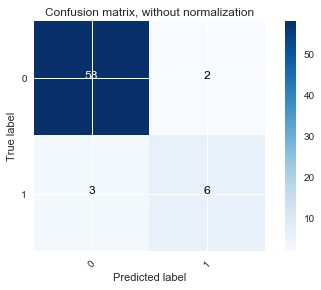

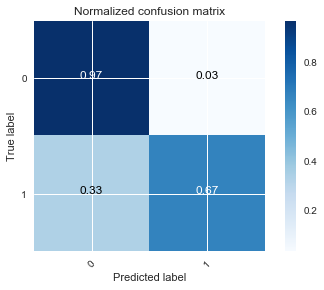

In [1378]:
plot_confusionmatrix(cm)

ROC curve for train data

In [1380]:
def plotROC(train_dfs):
    actual = train_dfs[1].values.T.tolist()
    actual = actual[0]
    pred_lst = pred.tolist()

    tp,fp,tn,fn = performance_measure(actual,pred_lst)

    probs = skmodel.predict_proba(train_dfs[0])
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(train_dfs[1], preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

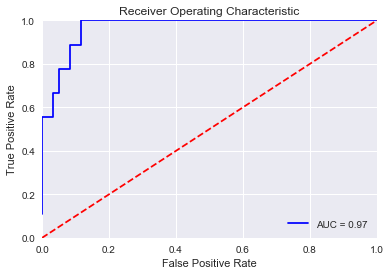

In [1381]:
plotROC(train_dfs)

The parameters and the p-values associated with them.

In [1288]:
pru_params = skmodel.coef_
pru_params = pru_params.tolist()
pru_params = pru_params[0]

In [1291]:
coef_pval_df = pd.DataFrame(columns=['Features','Parameters(Coefficients)','Pvalues'])
for i in range(0,len(pru_params)):
    row =[]
    row.append(pruned_features[i])
    row.append(pru_params[i])
    row.append(pruned_pvals[i])
    coef_pval_df.loc[i] = row

In [1292]:
print("\n****** Parameters and Pvalues of Classifier ******")
coef_pval_df


****** Parameters and Pvalues of Classifier ******


,Features,Parameters(Coefficients),Pvalues
0,var_rss12_mean,-0.262530,3.498148e-02
1,var_rss13_mean,-0.440340,3.813825e-02
2,avg_rss23_mean,1.097649,5.855089e-09
3,var_rss23_mean,-0.534581,1.319693e-02
4,var_rss12_median,-0.144994,4.218029e-02
5,avg_rss13_median,-0.166184,4.676843e-02
6,var_rss13_median,-0.702544,2.056581e-02
7,avg_rss23_median,-0.809767,5.824775e-08
8,var_rss23_median,-0.505293,1.241152e-02
9,avg_rss13_std,-0.117943,3.823677e-03


v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [1382]:
test_dfs = np.split(pruned_df_test,[-1],axis=1)
pred = skmodel.predict(test_dfs[0])
print('Accuracy Score: ', accuracy_score(test_dfs[1],pred))

Accuracy Score:  0.894736842105


In [1383]:
test_accuracy = accuracy_score(test_dfs[1],pred)
test_accuracy

0.89473684210526316

Predicted the model using the test data. As we can see the accuracy of the test data is around 89%. We can see that the accuracy is reduced on test data as compared to the train data. Which is as expected as the trained data was learned by the model and the test data is predicted by it.

Plotting confusion matrix for train data.

In [1384]:
cm_test=confusion_matrix(test_dfs[1],pred)

Confusion matrix, without normalization
[[15  0]
 [ 2  2]]
Normalized confusion matrix
[[ 1.   0. ]
 [ 0.5  0.5]]


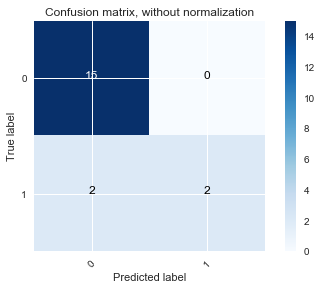

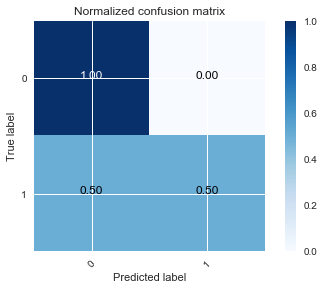

In [1385]:
plot_confusionmatrix(cm_test)

Plotting ROC curve for test data

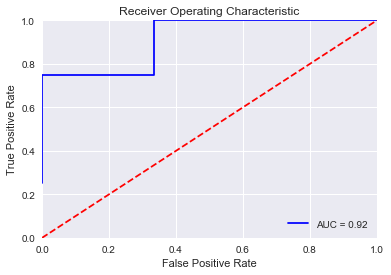

In [1386]:
plotROC(test_dfs)

In [1357]:
accuracy_df = pd.DataFrame(columns=['Test Accuracy','Train Accuracy'])
print('\n********* Comparison of accuracy between the Test Set and The Train Set **********')
accuracy_df.loc[0] = [test_accuracy*100,train_accuracy*100]
accuracy_df


********* Comparison of accuracy between the Test Set and The Train Set **********


,Test Accuracy,Train Accuracy
0,89.473684,92.753623


As seen from the table above the accuracy for the train set is higher than the test set by almost 3%.

vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Plotting the graph of the features after pruning and applying logistic regression so that we can see if they are well-seperated.

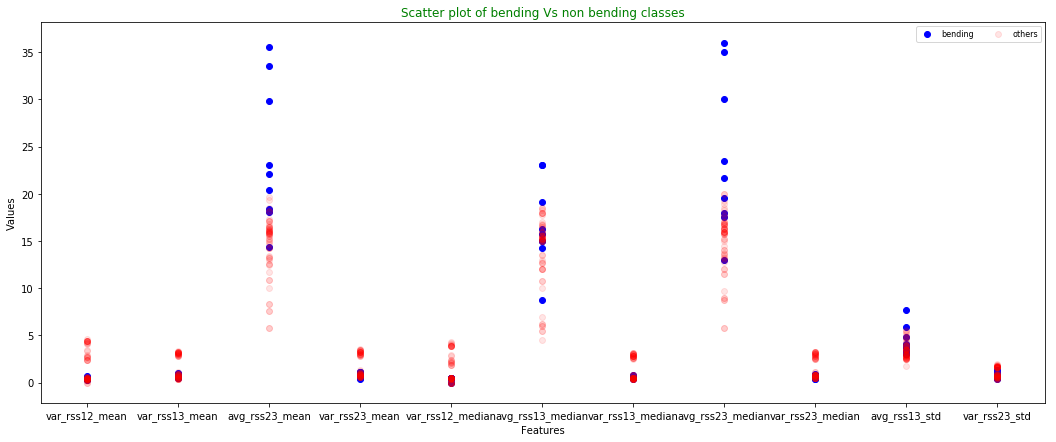

In [48]:
def plotgraph_pruned(train_df):
    col_scatter = pruned_features
    plt.figure(figsize=(18,7))
    for lst in range(1,len(col_scatter)):
        for i in range(0,len(train_df)):
            if (train_df.loc[i]['target']== 1):
                bending = plt.scatter(lst,train_df.loc[i][col_scatter[lst-1]],color = 'blue', label='bending')
            else:
                others = plt.scatter(lst,train_df.loc[i][col_scatter[lst-1]],color = 'red',label='others',alpha='0.1')
    # plt.legends()
    plt.legend((bending,others),
               ('bending','others'),
               scatterpoints=1,
               loc='top right',
               ncol=3,
               fontsize=8)
    plt.title('Scatter plot of bending Vs non bending classes',color='green')
    plt.xticks(range(1,len(col_scatter)),col_scatter)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()
plotgraph_pruned(pruned_df_train)

One more plot to understand better

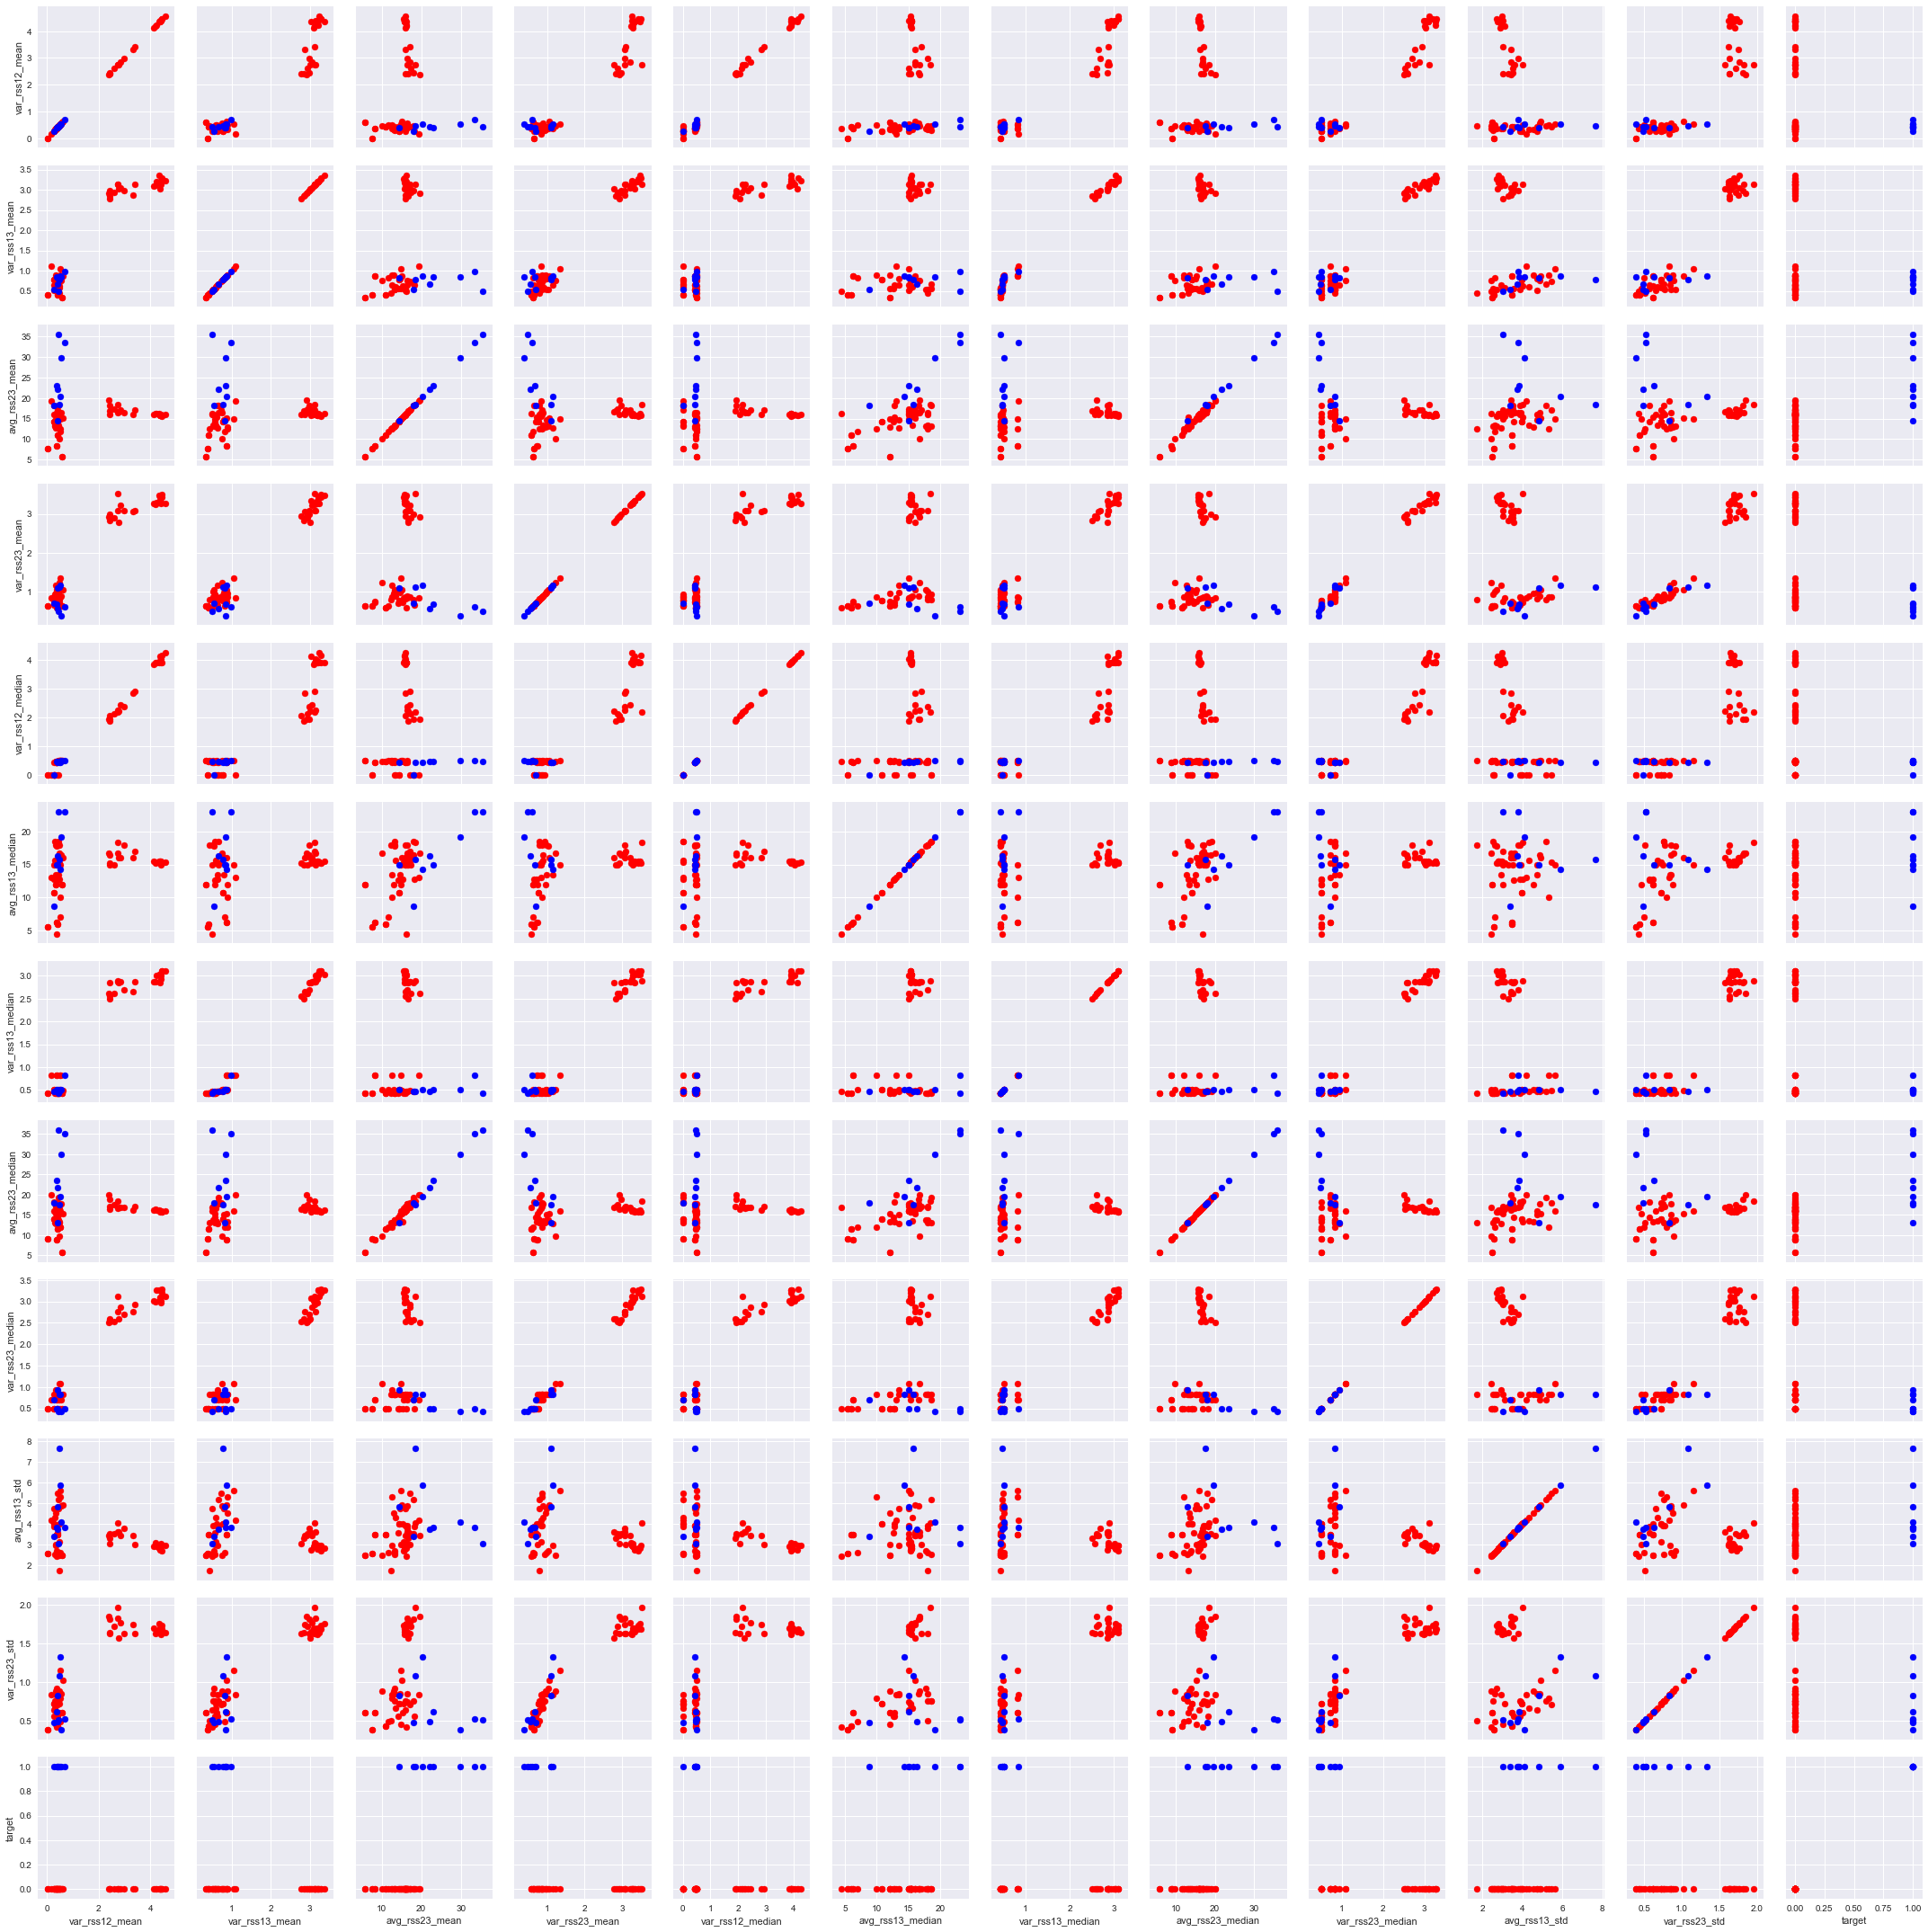

In [1531]:
g = sns.PairGrid(pruned_df_train,vars=pruned_features,hue = 'target',palette={0:'red',1:'blue'})
g=g.map(plt.scatter)

plt.show()

As seen from the plots we can say that the classes are quite well seperated. Hence it will not cause instability in calculating logistic regression.

vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

As observed from the confusion matrices obtained, there is no class imbalance for the train data but there is an imbalance in class 1 for the test data. since the true negatives are 50% for test data.
Hence there is an observation of class imbalance in class 1 of the test confusion matrix.

(e) Binary Classification Using L1-penalized logistic regression

i. Repeat 1(d)iii using L1-penalized logistic regression, i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and C, the weight of L1 penalty in your logistic regression objective function. Packages usually perform cross-validation for C automatically.5

In the below code i am applying L1 penalized logistic regression on the splits used in question d) iii) and using a for loop to change the values of C. The loop rund for C values from 1 to 25.

In [1555]:
c = {}
for i in range(1,25):
    kfold_accuracy_scores_L1_penalty = {}
    for key,value in split_name_dict.items():
        dfs = np.split(value,[-1],axis=1)
    #     skf = StratifiedKFold(n_splits=5,shuffle=True)
    #     splits = skf.get_n_splits(dfs[0], dfs[1])
        model = LogisticRegression(penalty='l1',C=i)
        score = cross_val_score(model,dfs[0],dfs[1],cv=5)
        kfold_accuracy_scores_L1_penalty[key] = score.mean()
    
    c[i]=kfold_accuracy_scores_L1_penalty

In [1556]:
c

{1: {'train_df_split1': 0.94175824175824174,
  'train_df_split10': 0.91014492753623188,
  'train_df_split2': 0.93492063492063482,
  'train_df_split3': 0.91730545876887337,
  'train_df_split4': 0.91999999999999993,
  'train_df_split5': 0.92463768115942035,
  'train_df_split6': 0.92997355274757576,
  'train_df_split7': 0.92147766323024061,
  'train_df_split8': 0.92008190008190005,
  'train_df_split9': 0.92096774193548403},
 2: {'train_df_split1': 0.95604395604395598,
  'train_df_split10': 0.91159420289855075,
  'train_df_split2': 0.94232804232804224,
  'train_df_split3': 0.91242740998838556,
  'train_df_split4': 0.90909090909090895,
  'train_df_split5': 0.91594202898550725,
  'train_df_split6': 0.92274463708492505,
  'train_df_split7': 0.91731099656357384,
  'train_df_split8': 0.90920556920556916,
  'train_df_split9': 0.92096774193548403},
 3: {'train_df_split1': 0.95604395604395598,
  'train_df_split10': 0.90434782608695663,
  'train_df_split2': 0.94232804232804224,
  'train_df_split3':

In the below code i am trying for higher values of C. The loop runs for values in range 100 to 150 for C.

In [1557]:
d = {}
for i in range(100,150):
    kfold_accuracy_scores_L1_penalty = {}
    for key,value in split_name_dict.items():
        dfs = np.split(value,[-1],axis=1)
    #     skf = StratifiedKFold(n_splits=5,shuffle=True)
    #     splits = skf.get_n_splits(dfs[0], dfs[1])
        model = LogisticRegression(penalty='l1',C=i)
        score = cross_val_score(model,dfs[0],dfs[1],cv=5)
        kfold_accuracy_scores_L1_penalty[key] = score.mean()
    
    d[i]=kfold_accuracy_scores_L1_penalty

In [1558]:
d

{100: {'train_df_split1': 0.91318681318681316,
  'train_df_split10': 0.90289855072463765,
  'train_df_split2': 0.89206349206349211,
  'train_df_split3': 0.8979094076655052,
  'train_df_split4': 0.90181818181818196,
  'train_df_split5': 0.89275362318840568,
  'train_df_split6': 0.90825741992359676,
  'train_df_split7': 0.89046391752577314,
  'train_df_split8': 0.89831285831285823,
  'train_df_split9': 0.90163870967741944},
 101: {'train_df_split1': 0.91318681318681316,
  'train_df_split10': 0.90289855072463765,
  'train_df_split2': 0.89206349206349211,
  'train_df_split3': 0.8979094076655052,
  'train_df_split4': 0.90181818181818196,
  'train_df_split5': 0.89275362318840568,
  'train_df_split6': 0.90825741992359676,
  'train_df_split7': 0.89046391752577314,
  'train_df_split8': 0.90376740376740372,
  'train_df_split9': 0.90163870967741944},
 102: {'train_df_split1': 0.89890109890109893,
  'train_df_split10': 0.90144927536231889,
  'train_df_split2': 0.89206349206349211,
  'train_df_spli

As observed we are getting the best accuracy at C=1 an L = 1. The highest accuracy achieved is at L=1, C=1 and the accuracy is 95%

ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

In [49]:
model = LogisticRegression(penalty='l1',C=1)
l1_dfs = np.split(train_df,[-1],axis=1)
fit = model.fit(l1_dfs[0],l1_dfs[1])
score = accuracy_score(l1_dfs[1],model.predict(l1_dfs[0]))

In [50]:
score

0.9710144927536232

In [55]:
sc = pd.DataFrame(columns=['Accuracy in non penalized logistic regression','Accuracy in L1-penalized logistic regression'])
sc.loc[0] = [train_accuracy,score]
sc

,Accuracy in non penalized logistic regression,Accuracy in L1-penalized logistic regression
0,0.927536,0.971014


When compared L1=penalized with variable selection using p-values the accuracy of L1 penalized is higher.
Hence L1-penalized is a better approach and performs better than variable selection.

The below code is written for trail please do not consider it in the evaluation.

In [59]:

f1,pval1 = feature_selection.f_classif(l1_dfs[0],l1_dfs[1])

In [60]:
l1_pval = {}
for i in range(0,len(pval1)):
    if (pval1[i]<0.05):
        print(col[i],'------>',pval1[i])
        l1_pval[col[i]] = pval1[i]
        

var_rss12_mean ------> 0.03498147840761755
var_rss13_mean ------> 0.03813825128265495
avg_rss23_mean ------> 5.855088990222132e-09
var_rss23_mean ------> 0.013196934257152392
var_rss12_median ------> 0.0421802870570279
avg_rss13_median ------> 0.046768431183124445
var_rss13_median ------> 0.020565805832970588
avg_rss23_median ------> 5.8247754618034686e-08
var_rss23_median ------> 0.01241152254583981
avg_rss13_std ------> 0.003823676706248659
var_rss23_std ------> 0.029638992257648083


Calculating accuracy using backward selection

In [64]:
from sklearn.feature_selection import RFECV
model_estimator = LogisticRegression(penalty='l1',C=1)
selector = RFECV(model_estimator,scoring='accuracy')
t = np.split(train_df,[-1],axis=1)
selector.fit(t[0],t[1])
rfe_score = selector.score(t[0],t[1])
rfe_score

0.9710144927536232

(f) Multi-class Classification (The Realistic Case)

i. Use the best l you found6 from 1(e)i to build an L1-penalized multinomial regression model to classify all activities in your training set.7 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.8

In the below code i am calculating the test error for L1-penalized multinomial regression model. The test error is stored in variable test_error.

In [1587]:
split2 = np.split(train_df,[-1],axis=1)
multinomial_model = LogisticRegression(penalty='l1',C=1,multi_class='multinomial',solver = 'saga').fit(split2[0],split2[1])
yhat = multinomial_model.predict(split2[0])
accu_scr = metrics.accuracy_score(split2[1],yhat)

In [1588]:
accu_scr

0.91304347826086951

In [1589]:
test_split2 = np.split(test_df,[-1],axis=1)
yhat_test = multinomial_model.predict(test_split2[0])
accu_scr_test = accuracy_score(test_split2[1],yhat_test)
test_error = 1-accu_scr_test
test_error

0.15789473684210531

In [1590]:
print("Test Error for mutinomial classification: ",test_error)

Test Error for mutinomial classification:  0.157894736842


Confusion matrix for multinomial classification

In [1591]:
cm=confusion_matrix(test_split2[1],yhat_test)

In [1592]:
def plotConfusionMatrixMultinomial(cm):
    class_names = np.array(folders)

    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Compute confusion matrix
    cnf_matrix = cm
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

Confusion matrix, without normalization
[[2 0 0 0 0 0 0]
 [1 0 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]
Normalized confusion matrix
[[ 1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.5   0.    0.5   0.    0.    0.    0.  ]
 [ 0.    0.    1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.67  0.33  0.  ]
 [ 0.    0.    0.    0.    0.    1.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.  ]]


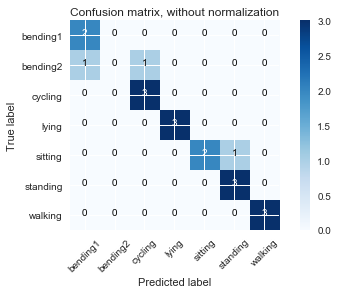

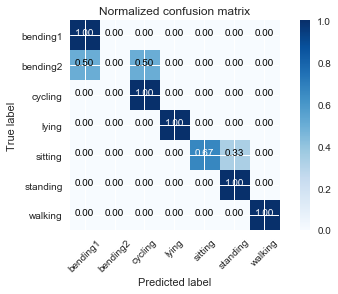

In [1593]:
plotConfusionMatrixMultinomial(cm)

Plotting ROC cureves for multinomial classification

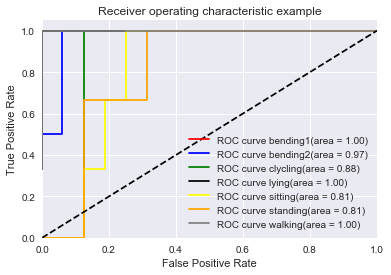

In [1594]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

y_test = label_binarize(test_split2[1], classes=folders)
y_train = label_binarize(split2[1],classes=folders)
n_classes = len(folders)

# classifier
clf = OneVsRestClassifier(LogisticRegression(penalty = 'l1',C=200, multi_class='multinomial',solver='saga'))
y_score = clf.fit(split2[0], y_train).predict_proba(test_split2[0])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
# for i in range(n_classes):
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve bending1(area = %0.2f)' % roc_auc[0], color = 'red')
plt.plot(fpr[1], tpr[1], label='ROC curve bending2(area = %0.2f)' % roc_auc[1], color = 'blue')
plt.plot(fpr[2], tpr[2], label='ROC curve clycling(area = %0.2f)' % roc_auc[2], color = 'green')
plt.plot(fpr[3], tpr[3], label='ROC curve lying(area = %0.2f)' % roc_auc[3], color = 'black')
plt.plot(fpr[4], tpr[4], label='ROC curve sitting(area = %0.2f)' % roc_auc[4], color = 'yellow')
plt.plot(fpr[5], tpr[5], label='ROC curve standing(area = %0.2f)' % roc_auc[5], color = 'orange')
plt.plot(fpr[6], tpr[6], label='ROC curve walking(area = %0.2f)' % roc_auc[6], color = 'grey')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ii. Repeat 1(f)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

Calculating test error using Gaussian Naive Bayes. The value is stored in the variable gau_error

In [1595]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB().fit(split2[0],split2[1])
gau_pred = gaussian.predict(test_split2[0])
gau_error = 1-(accuracy_score(test_split2[1],gau_pred))
gau_error

0.15789473684210531

Calculating test error using Multinomial Naiive Bayes. The value is stored in the variable mul_error.

In [1596]:
from sklearn.naive_bayes import MultinomialNB
multiNB = MultinomialNB().fit(split2[0],split2[1])
mul_pred = multiNB.predict(test_split2[0])
mul_error = 1-(accuracy_score(test_split2[1],mul_pred))
mul_error

0.10526315789473684

In [1598]:
comparison_df = pd.DataFrame(columns=['Test Error using L1 regularized','Test Error using Gaussian NB','Test Error usng Multinomial NB'])
comparison_df.loc[0]=[test_error,gau_error,mul_error]
comparison_df

,Test Error using L1 regularized,Test Error using Gaussian NB,Test Error usng Multinomial NB
0,0.157895,0.157895,0.105263


When we compare the the result we are getting the mimimum test error for multinomial naiive based classifier. 

iii. Which method is better for multi-class classification in this problem?

When compared based on error rates we can say that the multinomial naiive based classifier will be better for this problem.

# ISLR 3.7.4

4. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.


(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

Answer: There will be an decrease in the training RSS if we use flexibles models like cubic model. This happens because it is easier to get the predicted line closer to the observations when there is more flexibility how the output function can conform to the data.

(b) Answer (a) using test rather than training RSS.

Answer: Since the true underlying model is linear, especially in the case when the noise is fairly high and observations are more sparce, the model is going to fit the noise, and have less accuracy on the true underlying distribution, the RSS is probably going to be higher on the test set. Since the noise will also be added in the computation of RSS value, hence the accuracy will be better with training RSS.

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer

Answer: As stated earlier, the increase in flexibility in the model will allow it to fit to any observations in the training set more closely than a more restrictive model.

(d) Answer (c) using test rather than training RSS.

Answer: Because we do not know the true undelrying distribution it is hard to state. If it is far from linear than a more flexible model will probably perform better. If on the other hand it is fairly close to linear, and again the data is sparse, it is still possible that a mroe permissive model will "overfit" the training observations and result in higher test RSS.

# ISLR 4.7.3

3. This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class- specific mean vector and a class specific covariance matrix. We con- sider the simple case where p = 1; i.e. there is only one feature.
Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal dis- tribution, X ∼N(μk,σk2). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic.
Hint: For this problem, you should follow the arguments laid out in Section 4.4.2, but without making the assumption that σ12 = . . . = σK2 .

While using the Bayes classifier, we need to find the class ($k$) for which [p_k(x) = \frac{\pi_k(1/\sqrt{2\pi}\sigma)e^{-(1/2\sigma^2)(x - \mu_k)^2}}{\sum_{l = 1}^K\pi_l(1/\sqrt{2\pi}\sigma)e^{-(1/2\sigma^2)(x - \mu_l)^2}} = \frac{\pi_ke^{-(1/2\sigma^2)(x - \mu_k)^2}}{\sum_{l = 1}^K\pi_le^{-(1/2\sigma^2)(x - \mu_l)^2}}] is largest. As the log function is monotonally increasing, it is equivalent to finding $k$ for which [\log p_k(x) = \log \pi_k -(1/2\sigma^2)(x - \mu_k)^2 - \log \sum_{l = 1}^K\pi_le^{-(1/2\sigma^2)(x - \mu_l)^2}] is largest. As the last term is independant of $k$, we may restrict ourselves in finding $k$ for which [\log \pi_k -(1/2\sigma^2)(x - \mu_k)^2 = \log\pi_k - \frac{1}{2\sigma^2}x^2 + \frac{\mu_k}{\sigma^2}x - \frac{\mu_k^2}{2\sigma^2}] is largest. The term in $x^2$ is independant of $k$, so it remains to find $k$ for which [\delta_k(x) = \frac{\mu_k}{\sigma^2}x - \frac{\mu_k^2}{2\sigma^2} + \log\pi_k] is largest. As we might see that finding  kk  for which  pk(x)pk(x)  is largest is equivalent to finding  kk  for which [\log \pi_k -(1/2\sigma_k^2)(x - \mu_k)^2 = - \frac{1}{2\sigma_k^2}x^2 + \frac{\mu_k}{\sigma_k^2}x - \frac{\mu_k^2}{2\sigma_k^2} - \log\sigma_k + \log\pi_k] is largest. From the last expression we can say that it is not linear in xx.

# ISLR 4.7.7

Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X ̄ = 10, while the mean for those that didn’t was X ̄ = 0. In addition, the variance of X for these two sets of companies was σˆ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a nor- mal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.
Hint: Recall that the density function for a normal random variable is f(x) = √ 1 e−(x−μ)2/2σ2 . You will need to use Bayes’ theorem.

Plugging in the parameters and $X$ values in the equation for $p_k(x)$. We get [p_1(x) = \frac{0.8 e^{-(1/72)(x - 10)^2}}{0.8 e^{-(1/72)(x - 10)^2} + 0.2 e^{-(1/72)(x - 0)^2}} = 0.752;] Hence the probability that a company will issue a dividend this year given that its percentage return was $X = 4$ last year is $0.752$.